<span style="font-size:large;">
<div style="text-align: right">IM-UH 1511 <b>Introduction to Digital Humanities</b><br/>
Student name: <span style="color:blue"><b>X XX</b></span><br/>
Grade: <span style="color:red"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 6</span>
# <span style="color:green">Albums and Songs

In [1]:
from bs4.element import NavigableString
import logging
import random
import six
import requests
from bs4 import BeautifulSoup as BS
import re
import pandas as pd
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.simplefilter('ignore')

In [2]:
def uniqueid():
    seed = random.getrandbits(1)
    while True:
        yield seed
        seed += 1

uid = uniqueid()

def get_lyrics(artist, get_album_genre=False):
    base_url = 'http://lyrics.wikia.com'
    url_ext = '/wiki/'
    search_url = base_url + url_ext + 'Special:Search?query=' + artist.replace(' ', '+')
    search_resp = requests.get(search_url)
    soup = BS(search_resp.content, "lxml")
    results = soup.find_all('a', {'class': 'result-link'})    
    artist_url = results[0].attrs['href']    
    logging.info('GET Artist URL: ' + artist_url)    
    req = requests.get(artist_url)
    resp = BS(req.content, 'html')    
    genre = ''
    genre_tag = resp.find_all('table', {'class': 'artist-info-box'})
    if genre_tag:
        for atag in resp.find_all('table', {'class': 'artist-info-box'})[0].find_all('a'):
            if 'Category:Genre' in atag.attrs['href']:
                genre += ('|' if genre else genre) + atag.text    
    albums = {}
    nodes = resp.find_all('div', {'id': 'mw-content-text'})[0].find_all()
    for node in nodes:
        if node.name == 'h2':
            if node.find_all('span'):
                a_tag = node.find_all('a')
                album_url_span = node.findChild('span', {'class': 'mw-headline'})
                album_url_a = album_url_span if not album_url_span else album_url_span.findChild('a')
                album_url = album_url_a if not album_url_a else album_url_a.attrs.get('href')
                title = 'Misc (0000)' if not a_tag else a_tag[0].text
                year_search = re.search('([0-9]{4})', title)
                album_year = None if not year_search else year_search.group(0)
                albums[title] = {}
                albums[title]['year'] = album_year
                albums[title]['album_url'] = None if not album_url else (base_url + album_url)
        if node.name == 'ol':
            for song in node:
                track_a = song.find_all('a')
                if not track_a: continue
                if not track_a:
                    continue
                track_node = track_a[0]
                track_name = track_node.text
                track_href = track_node.get('href')
                if 'tracks' not in albums[title]:
                    albums[title]['tracks'] = {}
                albums[title]['tracks'][track_name] = track_href
    lyrics_obj = []
    try:
        album_keys = albums.keys()
        for album in album_keys:
            album_url = albums[album]['album_url']
            album_genre = ''
            if get_album_genre and album_url:
                album_req = requests.get(album_url)
                album_soup = BS(album_req.content, "lxml")
                genre_tag = album_soup.find_all('div', {'id': 'mw-content-text'})
                if genre_tag:
                    for atag in album_soup.findChild('div', {'id': 'mw-content-text'}).find_all('a'):
                        if 'Category:Genre' in atag.attrs['href']:
                            album_genre += ('|' if album_genre else album_genre) + atag.text
            logging.info('GET Artist Album: ' + album)
            track_keys = albums[album].get('tracks')
            if track_keys:
                year = albums[album]['year']
                for song in track_keys:
                    print(track_keys[song])
                    if track_keys[song] == None:
                        continue
                    else:
                        resp = requests.get(base_url + track_keys[song])
                        lyric_soup = BS(resp.content, "lxml")
                        lyrics_div = lyric_soup.find_all('div', {'class': 'lyricbox'})
                        lyrics_div = None if not lyrics_div else lyrics_div[0]
                        if lyrics_div:
                            for lyric in lyrics_div.childGenerator():
                                if isinstance(lyric, NavigableString) and lyric.strip():
                                    lyric_dict = {
                                        'artist': artist,
                                        'lyric': lyric,
                                        'song': song,
                                        'year': year,
                                        'album': album,
                                        'id': next(uid),
                                        'id': six.next(uid),
                                        'genre': genre,
                                        'album_genre': album_genre
                                    }
                                    lyrics_obj.append(lyric_dict)
            logging.info('GET Artist Album Successful: ' + album)
        return lyrics_obj
    except KeyboardInterrupt:
        return lyrics_obj

In [3]:
artist='Meatloaf'
songs = get_lyrics(artist)
print(len(songs))
songs[0]

/wiki/Meat_Loaf:Bat_Out_Of_Hell
/wiki/Meat_Loaf:You_Took_The_Words_Right_Out_Of_My_Mouth_(Hot_Summer_Night)
/wiki/Meat_Loaf:Heaven_Can_Wait
/wiki/Meat_Loaf:All_Revved_Up_With_No_Place_To_Go
/wiki/Meat_Loaf:Two_Out_Of_Three_Ain%27t_Bad
/wiki/Meat_Loaf:Paradise_By_The_Dashboard_Light
/wiki/Meat_Loaf:For_Crying_Out_Loud
/wiki/Meat_Loaf:Peel_Out
/wiki/Meat_Loaf:I%27m_Gonna_Love_Her_For_Both_Of_Us
/wiki/Meat_Loaf:More_Than_You_Deserve
/wiki/Meat_Loaf:I%27ll_Kill_You_If_You_Don%27t_Come_Back
/wiki/Meat_Loaf:Read_%27Em_And_Weep
/wiki/Meat_Loaf:Nocturnal_Pleasure
/wiki/Meat_Loaf:Dead_Ringer_For_Love
/wiki/Meat_Loaf:Everything_Is_Permitted
/wiki/Meat_Loaf:Razor%27s_Edge
/wiki/Meat_Loaf:Midnight_At_The_Lost_And_Found
/wiki/Meat_Loaf:Wolf_At_Your_Door
/wiki/Meat_Loaf:Keep_Driving
/wiki/Meat_Loaf:The_Promised_Land
/wiki/Meat_Loaf:You_Never_Can_Be_Too_Sure_About_The_Girl
/wiki/Meat_Loaf:Priscilla
/wiki/Meat_Loaf:Don%27t_You_Look_At_Me_Like_That
/wiki/Meat_Loaf:If_You_Really_Want_To
/wiki/Meat_Loaf:

/wiki/Meat_Loaf:Couldn%27t_Have_Said_It_Better
/wiki/Meat_Loaf:Did_I_Say_That%3F
/wiki/Meat_Loaf:Why_Isn%27t_That_Enough
/wiki/Meat_Loaf:Love_You_Out_Loud
/wiki/Meat_Loaf:Man_Of_Steel
/wiki/Meat_Loaf:Testify
/wiki/Meat_Loaf:Tear_Me_Down
/wiki/Meat_Loaf:You%27re_Right,_I_Was_Wrong
/wiki/Meat_Loaf:Because_Of_You
/wiki/Meat_Loaf:Do_It!
/wiki/Meat_Loaf:Forever_Young
/wiki/Meat_Loaf:Mercury_Blues
/wiki/Meat_Loaf:Bat_Out_Of_Hell
/wiki/Meat_Loaf:Life_Is_A_Lemon_And_I_Want_My_Money_Back
/wiki/Meat_Loaf:I%27d_Do_Anything_For_Love_(But_I_Won%27t_Do_That)
/wiki/Meat_Loaf:Bat_Out_Of_Hell
/wiki/Meat_Loaf:You_Took_The_Words_Right_Out_Of_My_Mouth_(Hot_Summer_Night)
/wiki/Meat_Loaf:Heaven_Can_Wait
/wiki/Meat_Loaf:All_Revved_Up_With_No_Place_To_Go
/wiki/Meat_Loaf:Two_Out_Of_Three_Ain%27t_Bad
/wiki/Meat_Loaf:Paradise_By_The_Dashboard_Light
/wiki/Meat_Loaf:For_Crying_Out_Loud
/wiki/Meat_Loaf:I%27d_Do_Anything_For_Love_(But_I_Won%27t_Do_That)
/wiki/Meat_Loaf:Couldn%27t_Have_Said_It_Better
/wiki/Meat_Loaf:

{'artist': 'Meatloaf',
 'lyric': 'The sirens are screaming and the fires are howling',
 'song': 'Bat Out of Hell',
 'year': '1977',
 'album': 'Bat Out of Hell (1977)',
 'id': 1,
 'genre': '',
 'album_genre': ''}

In [4]:
sdf = pd.DataFrame(songs)
group = ['song', 'year', 'album', 'genre', 'artist']
ldf = sdf.sort_values(group)\
       .groupby(group).lyric\
       .apply(' '.join)\
       .reset_index(name='lyric')
print(len(ldf)) 
ldf.rename(columns={'album': 'albumy'}, inplace=True)
ldf.columns
alb=[]
for i in range(len(ldf)):
    alb.append(ldf.iloc[i]['albumy'][:-7])
ldf['album']=alb
# ldf=ldf.drop('albumy', axis=1)
ldf=ldf.drop('genre', axis=1)
ldf=ldf.drop('artist', axis=1)
ldf=ldf[["song","album","year","albumy","lyric"]]
ldf

260


,song,album,year,albumy,lyric
0,2 Out Of 3 Ain't Bad,Hang Cool Teddy Bear,2010,Hang Cool Teddy Bear (2010),"Baby, we can talk all night But that ain't get..."
1,40 Days,Hell In A Handbasket,2011,Hell In A Handbasket (2011),"Some say it's wrong, some say it's right Some ..."
2,A Kiss Is A Terrible Thing To Waste,The Very Best of Meat Loaf,1998,The Very Best of Meat Loaf (1998),If you listen to the night You can hear the da...
3,Alive,Bat Out Of Hell III: The Monster Is Loose,2006,Bat Out Of Hell III: The Monster Is Loose (2006),I'm still alive Must have been a miracle It's ...
4,All Of Me,Hell In A Handbasket,2011,Hell In A Handbasket (2011),I caught a glimpse of myself today Wasn't a pr...
...,...,...,...,...,...
255,You Took The Words Right Out Of My Mouth (Hot ...,The Very Best of Meat Loaf,1998,The Very Best of Meat Loaf (1998),"On a hot summer night, would you offer your th..."
256,You Took The Words Right Out Of My Mouth (Hot ...,Royal Philharmonic Orchestra Plays Meat Loaf,1999,Royal Philharmonic Orchestra Plays Meat Loaf (...,"On a hot summer night, would you offer your th..."
257,You Took The Words Right Out Of My Mouth (Hot ...,Bat out of Hell: Live with the Melbourne Symph...,2004,Bat out of Hell: Live with the Melbourne Symph...,"On a hot summer night, would you offer your th..."
258,You Took the Words Right Out of My Mouth (Hot ...,Bat Out of Hell,1977,Bat Out of Hell (1977),"On a hot summer night, would you offer your th..."


In [5]:
lg=ldf["song"].groupby(ldf["albumy"]).count()
lg=lg.reset_index()
lg.rename(columns={'song': 'number of songs'}, inplace=True)
lg

,albumy,number of songs
0,Back From Hell - The Very Best (1993),15
1,Bad Attitude (1984),9
2,Bat Out Of Hell II: Back Into Hell (1993),10
3,Bat Out Of Hell III: The Monster Is Loose (2006),14
4,Bat Out of Hell (1977),7
5,Bat out of Hell: Live with the Melbourne Symph...,9
6,Blind Before I Stop (1986),10
7,Braver Than We Are (2016),10
8,Couldn't Have Said It Better (2003),14
9,Dead Ringer (1981),8


In [6]:
albums=list(set(ldf.album.values))
year=[]
no_songs=[]
for a in albums:
    no_songs.append(len(list(set(ldf.loc[ldf['album']==a]['song'].values))))
    year.append(list(set(ldf.loc[ldf['album']==a]['year'].values))[0])
    y=' '.join(list(set(ldf.loc[ldf['album']==a]['year'].values)))
    c=[]
album = albums
lgy = pd.DataFrame(
    {'album': album,
     'year': year,
     'number of songs': no_songs
    })
lgy=lgy[["album",'year','number of songs']]
lgy.sort_values('year')

,album,year,number of songs
16,Bat Out of Hell,1977,7
10,Dead Ringer,1981,8
21,Midnight At The Lost & Found,1983,10
17,Hits Out of Hell,1984,10
8,Bad Attitude,1984,9
0,Blind Before I Stop,1986,10
19,Live at Wembley,1987,10
2,Heaven & Hell,1989,14
15,Back From Hell - The Very Best,1993,15
20,Bat Out Of Hell II: Back Into Hell,1993,10


### 1. The bipartite graph of songs and albums

In [7]:
sae=[]
for i in range(len(ldf)):
    s=ldf.iloc[i]['song']
    a=ldf.iloc[i]['album']
    y=ldf.iloc[i]['year']
    ly=ldf.iloc[i]['lyric']
    sae.append((s,a,y,ly))
saed=[]
for t in sae:
    year_l={'year_l':(t[2],t[3])}
    if t[0] not in ldf.album.unique():
        saed.append((t[0],t[1],year_l)) #,lyric))
    else:
        saed.append((t[0]+"_song",t[1],year_l))
saed=sorted(saed)
albums=list(set(ldf.album.values))
# songs=set(ldf.song.values)
t1=[]
t11=[]
t2=[]
for a in albums:
    for s in ldf.song.unique():
        if s==a:
            t11.append(s)
            ss=s+"_song"
            if ss not in t1:
                t1.append(ss)
for s in ldf.song.unique():
     if s not in t11:
        t2.append(s)
songs=t1+t2
for i in songs:
    if i in albums:
        print(i)
H=nx.MultiGraph()
H.add_edges_from(saed)
print("The graph H connecting the %i songs to the %i albums has: \n %i nodes and %i edges" %(len(songs),len(albums),len(H.nodes()),len(H.edges())))
print("Is H multigraph?", H.is_multigraph())
print("Is H bipartite?", nx.is_bipartite(H))

The graph H connecting the 150 songs to the 22 albums has: 
 172 nodes and 260 edges
Is H multigraph? True
Is H bipartite? True


In [8]:
pos = nx.spring_layout(H, k=15.,iterations=1000)
r=0.3 #26
Ga=nx.Graph()
Ga.add_nodes_from(albums)
posalb=nx.circular_layout(Ga)
for a in albums:
    pos[a]=(r*posalb[a][0],r*posalb[a][1])

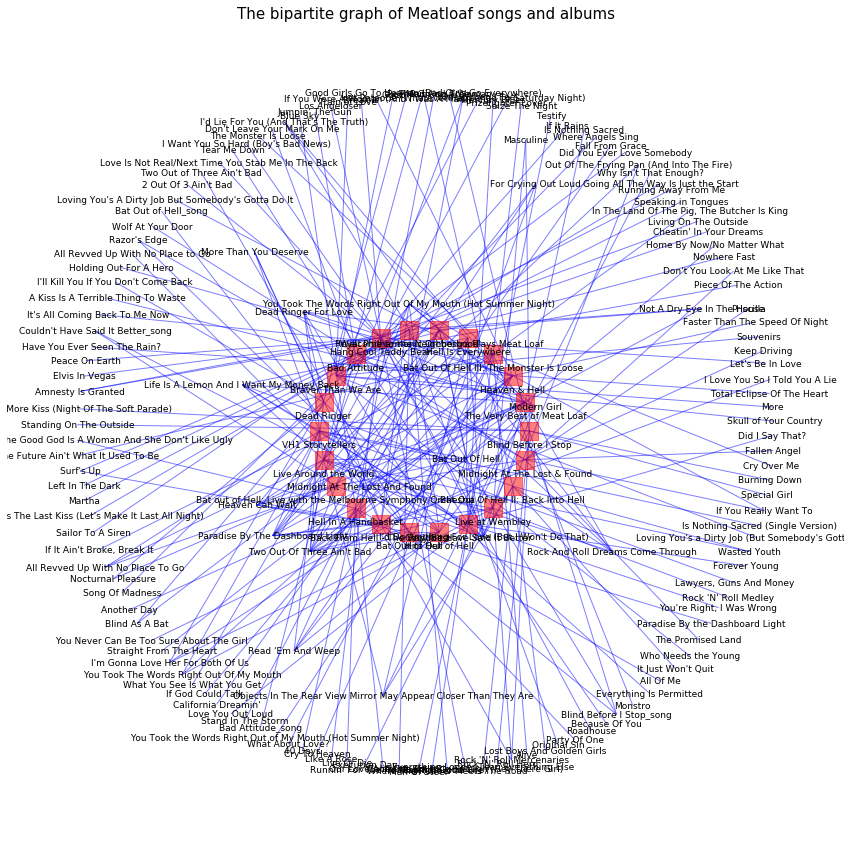

In [9]:
figsize=(15,15)

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=list(albums),node_color="r",node_shape='s',alpha=0.5)#"#ffb3b3"
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=list(songs),node_size=0,node_color="g",node_shape='o',alpha=0.5)#"#b3ffb3"
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.04  # offset on the y axis
for k, v in pos.items():
    if k in albums:
        yoffset[k] = (v[0], v[1]+y_off)
    else:
        yoffset[k] = v
nx.draw_networkx_labels(H, yoffset,font_size=9);
sst="The bipartite graph of %s songs and albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### 2. The intersection graph of albums in the songs that they contain

In [10]:
aed=[]
for a1 in albums:
    for a2 in albums:
        if a2!=a1:
            t=[]
            for s in songs:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting albums containing common songs has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))

The graph HA connecting albums containing common songs has: 
 20 nodes and 104 edges
Is HA weighted? True


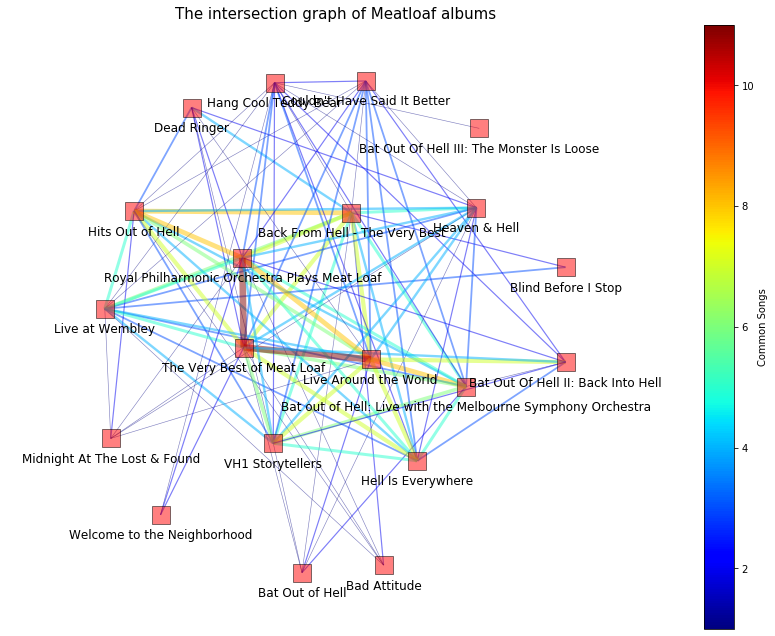

In [11]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[0.6*w for w in weight_list] # [math.log(1+w) for w in weight_list]

plt.figure(figsize=(10,7));
pos = nx.spring_layout(HA, k=15, iterations=200) #graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
# nx.draw_networkx_edge_labels(HA,pos=pos,edge_labels=weight);
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Common Songs") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The intersection graph of %s albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.2, y=0.1) 

### 3. The graph of co-occurring songs in the albums

In [12]:
aed=[]
for a1 in songs:
    for a2 in songs:
        if a2!=a1:
            t=[]
            for s in albums:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting songs co-occurring in albums has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))
      

The graph HA connecting songs co-occurring in albums has: 
 150 nodes and 1229 edges
Is HA weighted? True


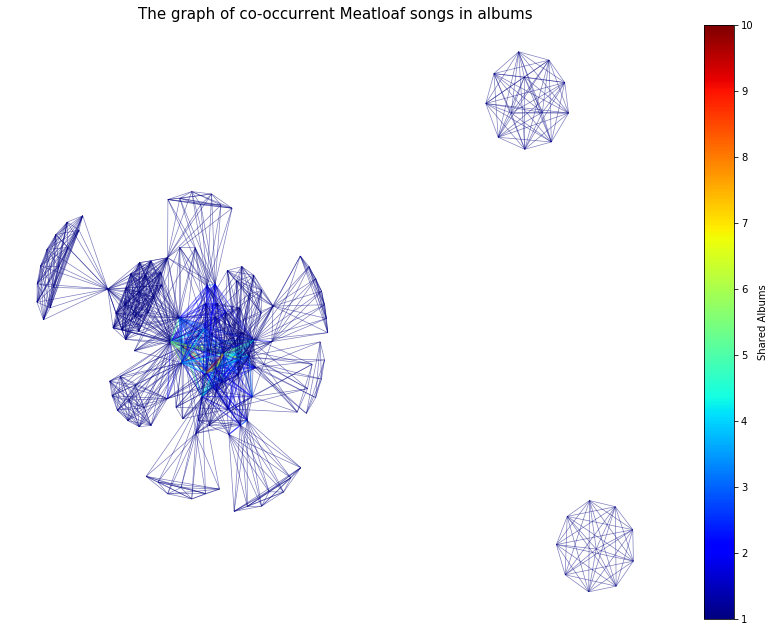

In [13]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

plt.figure(figsize=(10,7));
pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);

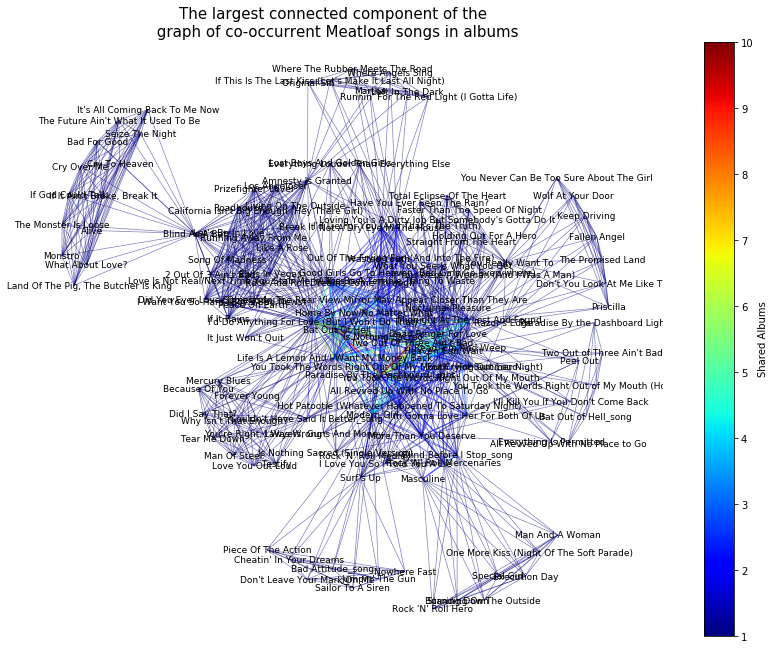

In [14]:
giant = max(connected_component_subgraphs(HA), key=len)
plt.figure(figsize=(10,7));
HA=giant
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset,font_size=9,);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The largest connected component of the \n graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 